In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
(X_train, _), (X_test, _) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0


In [4]:
X_train = X_train.reshape((len(X_train), np.prod(X_train.shape[1:])))
X_test = X_test.reshape((len(X_test), np.prod(X_test.shape[1:])))

In [5]:
def create_autoencoder_model():
    model = Sequential([
        Dense(128, activation='relu', input_shape=(784,)),
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(64, activation='relu'),
        Dense(128, activation='relu'),
        Dense(784, activation='sigmoid')
    ])
    return model

In [6]:
def train_autoencoder_model():
    model = create_autoencoder_model()
    model.compile(optimizer='adam', loss='binary_crossentropy')
    model.fit(X_train, X_train, epochs=10, batch_size=256, shuffle=True, validation_data=(X_test, X_test))
    return model

In [7]:
autoencoder_model = train_autoencoder_model()

Epoch 1/10
235/235 [==============================] - 5s 16ms/step - loss: 0.2499 - val_loss: 0.1713
Epoch 2/10
235/235 [==============================] - 4s 16ms/step - loss: 0.1560 - val_loss: 0.1404
Epoch 3/10
235/235 [==============================] - 5s 22ms/step - loss: 0.1354 - val_loss: 0.1284
Epoch 4/10
235/235 [==============================] - 4s 16ms/step - loss: 0.1264 - val_loss: 0.1214
Epoch 5/10
235/235 [==============================] - 4s 15ms/step - loss: 0.1197 - val_loss: 0.1151
Epoch 6/10
235/235 [==============================] - 5s 22ms/step - loss: 0.1142 - val_loss: 0.1105
Epoch 7/10
235/235 [==============================] - 4s 15ms/step - loss: 0.1103 - val_loss: 0.1073
Epoch 8/10
235/235 [==============================] - 4s 15ms/step - loss: 0.1075 - val_loss: 0.1051
Epoch 9/10
235/235 [==============================] - 4s 17ms/step - loss: 0.1053 - val_loss: 0.1035
Epoch 10/10
235/235 [==============================] - 4s 19ms/step - loss: 0.1035 - val_lo

In [8]:
reconstructed_images = autoencoder_model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [9]:
import matplotlib.pyplot as plt

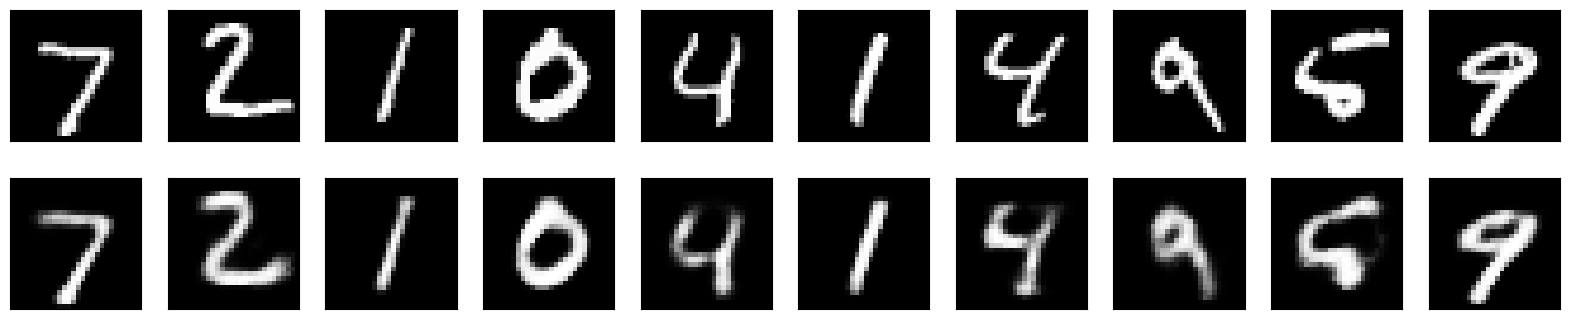

In [10]:
n = 10  # Number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)


    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(reconstructed_images[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()